**Importanto bibliotecas principais**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt
import missingno as msno  
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder          

**Carregando dados no colab**

Dataset: https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation/input

In [2]:
df = pd.read_csv('recipeData.csv', encoding='latin-1') #salvando o dataset em um dataframe
df.head() #visualizando cabeçalho do dataset

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


**Verificando dados vazios**

In [3]:
# Verificando dados
print ("Tabela 1 - Verificação de dados")
print(df.info())
print("\n") #paragráfo entre os resultados

# Verificando se há algum valor vazio
print ("Tabela 2 - Verificação de dados vazios")
print(df.isna().any())
print("\n")

# Verificando quantidade de dados vazios
print ("Tabela 3 - Verificação de quantidade de dados vazios")
print(df.isna().sum())
print("\n")

Tabela 1 - Verificação de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     738

**Visualizando dados vázios gráficamente**

<Axes: >

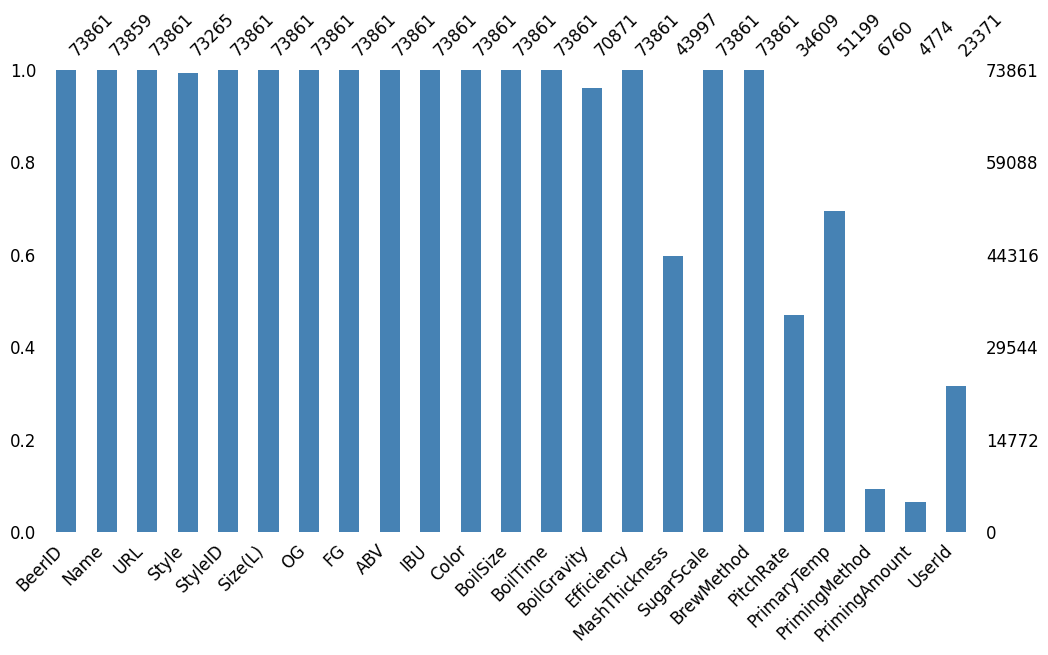

In [4]:
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

**Verificando índice dos valores nulos da coluna Style**

In [5]:
# Salvando os índices dos registros com valores nulos na coluna 'coluna'
indices_nulos = df[df['Style'].isnull()].index.tolist()

# Exibindo os índices que têm valores nulos
print("Índices com valores nulos:", indices_nulos)

Índices com valores nulos: [38, 87, 192, 347, 577, 816, 944, 1002, 1107, 1178, 1398, 1530, 1633, 1796, 1944, 1954, 1993, 2163, 2211, 2494, 2563, 3141, 3229, 3436, 3755, 3950, 4174, 4217, 4355, 4370, 4394, 4399, 4575, 4630, 4822, 4865, 4989, 5032, 5211, 5240, 5261, 5356, 5434, 5490, 5850, 5867, 5986, 6045, 6340, 6471, 6508, 6582, 6705, 6875, 6928, 6979, 7073, 7157, 7202, 7211, 7681, 7759, 7824, 7850, 7875, 7962, 7996, 8185, 8186, 8307, 8376, 8414, 8450, 8511, 8568, 8599, 8823, 8858, 8893, 8907, 8924, 8925, 8945, 8976, 8987, 8998, 9011, 9223, 9329, 9349, 9416, 9446, 9470, 9474, 9485, 9517, 9531, 9544, 9574, 9627, 9667, 9707, 9725, 9758, 9796, 9809, 9827, 9859, 9958, 10111, 10161, 10361, 10362, 10423, 10430, 10433, 10446, 10531, 10544, 10589, 10738, 10803, 11169, 11188, 11219, 11234, 11249, 11251, 11307, 11312, 11329, 11386, 11406, 11413, 11446, 11536, 11616, 11695, 11707, 11745, 11839, 11871, 11922, 11976, 11987, 12024, 12065, 12094, 12131, 12174, 12186, 12195, 12326, 12406, 12423, 12465

**Imputando dados pela média**

In [6]:
# Imputação pela média ou mediana
# Imputando valores ausentes (NaN) pela média nas colunas numéricas
df_mean_imputed = df.copy()  # Criando uma cópia do DataFrame para imputação pela média

# Aplicando a imputação
for col in df_mean_imputed.select_dtypes(include=['float64', 'int64']).columns:
    df_mean_imputed[col].fillna(df_mean_imputed[col].mean(), inplace=True)

# Exibindo as primeiras linhas do DataFrame após imputação pela média
print("DataFrame após imputação pela média:")
print(df_mean_imputed.head())

DataFrame após imputação pela média:
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                        American

/tmp/ipykernel_1820/3927368730.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_imputed[col].fillna(df_mean_imputed[col].mean(), inplace=True)


<Axes: >

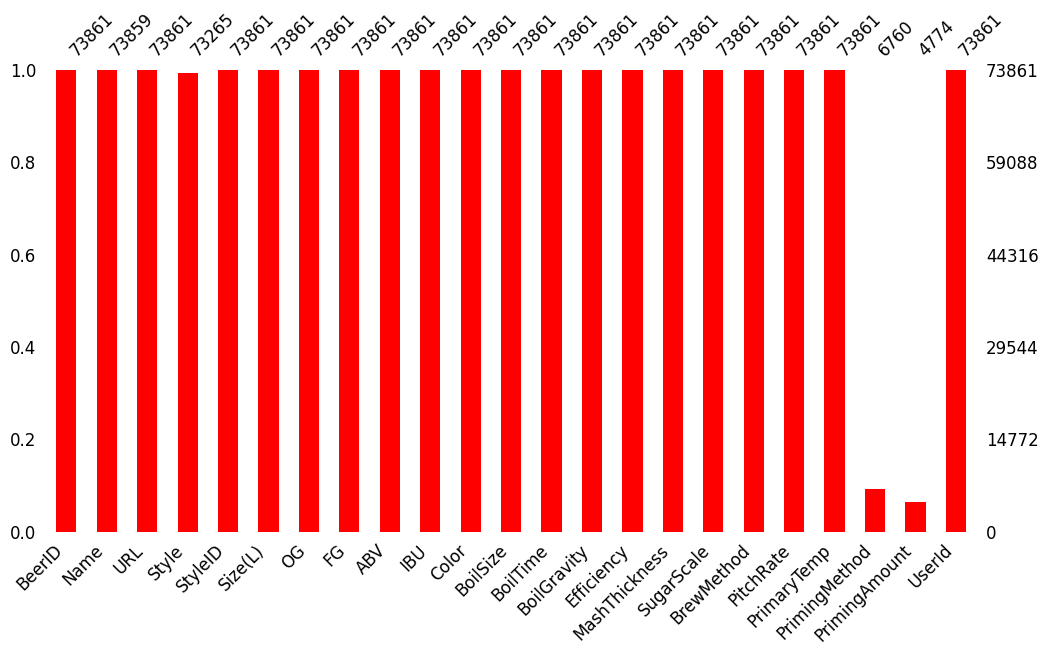

In [7]:
msno.bar(df_mean_imputed, figsize=(12, 6), fontsize=12, color='red')

**Imputando dados pela mediana**

In [8]:
# Caso prefira imputar pela mediana, pode-se usar o código abaixo:
df_median_imputed = df.copy()  # Criando uma cópia do DataFrame para imputação pela mediana

for col in df_median_imputed.select_dtypes(include=['float64', 'int64']).columns:
    df_median_imputed[col].fillna(df_median_imputed[col].median(), inplace=True)

# Exibindo as primeiras linhas do DataFrame após imputação pela mediana
print("DataFrame após imputação pela mediana:")
print(df_median_imputed.head())

DataFrame após imputação pela mediana:
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                        Americ

/tmp/ipykernel_1820/1631727001.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_imputed[col].fillna(df_median_imputed[col].median(), inplace=True)
/tmp/ipykernel_1820/1631727001.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

<Axes: >

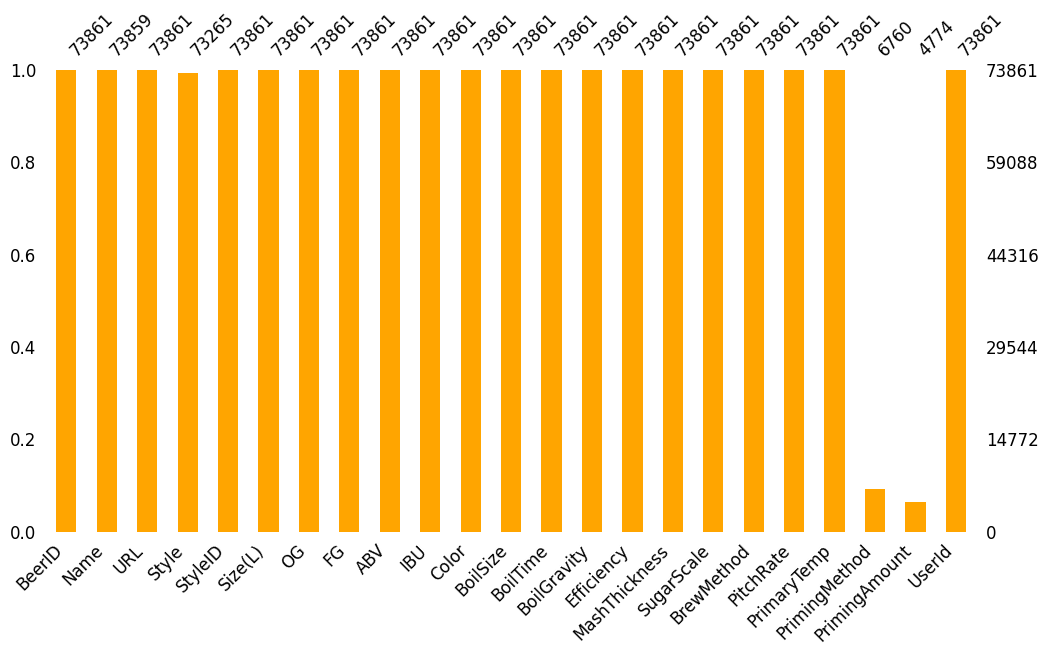

In [9]:
msno.bar(df_mean_imputed, figsize=(12, 6), fontsize=12, color='orange')

**Imputando a média dos grupos formados pela coluna "Style" (estilo da cerveja)**

In [10]:
# Selecionar apenas as colunas numéricas para realizar a imputação
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Imputação pela média dentro dos grupos ('Style')
df_grouped_mean_imputed = df.copy()

# Aplicando a imputação pela média para as colunas numéricas, agrupado pela coluna 'Style'
df_grouped_mean_imputed[numeric_columns] = df.groupby('Style')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

# Exibindo as primeiras linhas do DataFrame após a imputação
print("DataFrame após imputação pela média dentro de grupos 'Style':")
print(df_grouped_mean_imputed.head())

DataFrame após imputação pela média dentro de grupos 'Style':
   BeerID                             Name  \
0     1.0                Vanilla Cream Ale   
1     2.0      Southern Tier Pumking clone   
2     3.0      Zombie Dust Clone - EXTRACT   
3     4.0    Zombie Dust Clone - ALL GRAIN   
4     5.0  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale     45.0    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer     85.0    20.82  1.083  1.021  8.16   
2                        American IPA      7.0    18.93  1.063  1.018  5.91   
3       

<Axes: >

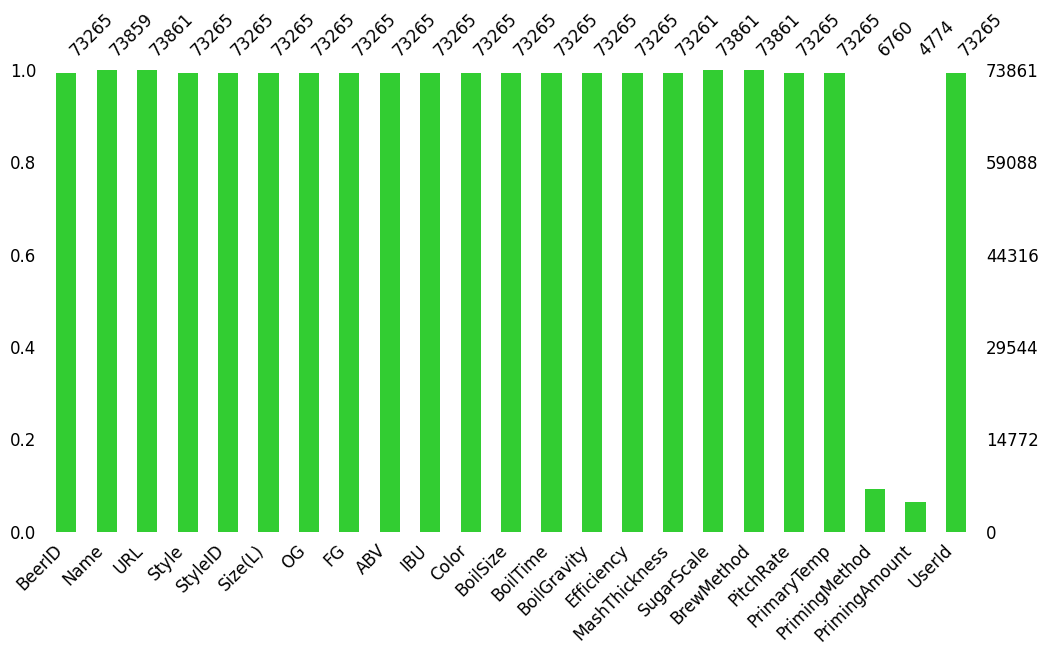

In [11]:
msno.bar(df_grouped_mean_imputed, figsize=(12, 6), fontsize=12, color='limegreen')

**Imputando a mediana dos grupos formados pela coluna "Style" (estilo da cerveja)**

In [12]:
# Caso prefira a mediana, pode-se aplicar a imputação pela mediana da seguinte maneira:
df_grouped_median_imputed = df.copy()

# Aplicando a imputação pela mediana para as colunas numéricas, agrupado pela coluna 'Style'
df_grouped_median_imputed[numeric_columns] = df.groupby('Style')[numeric_columns].transform(lambda x: x.fillna(x.median()))

# Exibindo as primeiras linhas do DataFrame após a imputação
print("DataFrame após imputação pela mediana dentro de grupos 'Style':")
print(df_grouped_median_imputed.head())

DataFrame após imputação pela mediana dentro de grupos 'Style':
   BeerID                             Name  \
0     1.0                Vanilla Cream Ale   
1     2.0      Southern Tier Pumking clone   
2     3.0      Zombie Dust Clone - EXTRACT   
3     4.0    Zombie Dust Clone - ALL GRAIN   
4     5.0  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale     45.0    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer     85.0    20.82  1.083  1.021  8.16   
2                        American IPA      7.0    18.93  1.063  1.018  5.91   
3     

<Axes: >

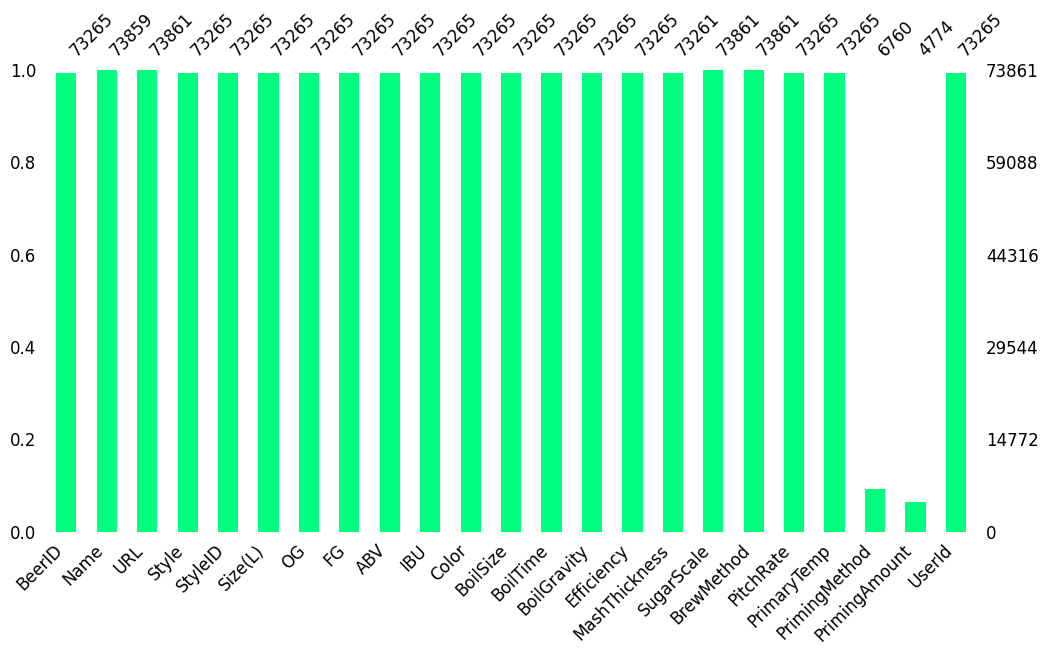

In [13]:
msno.bar(df_grouped_median_imputed, figsize=(12, 6), fontsize=12, color='springgreen')

**Fowardfill**

In [14]:
# Aplicando o método Forward Fill (ffill) para preencher valores ausentes
df_ffill = df.copy()

# Preenchendo valores ausentes com o último valor observado não ausente (forward fill)
df_ffill.fillna(method='ffill', inplace=True)

# Exibindo as primeiras linhas do DataFrame após o preenchimento
print("DataFrame após aplicar Forward Fill (ffill):")
print(df_ffill.head())

DataFrame após aplicar Forward Fill (ffill):
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                        

/tmp/ipykernel_1820/173522363.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill.fillna(method='ffill', inplace=True)


<Axes: >

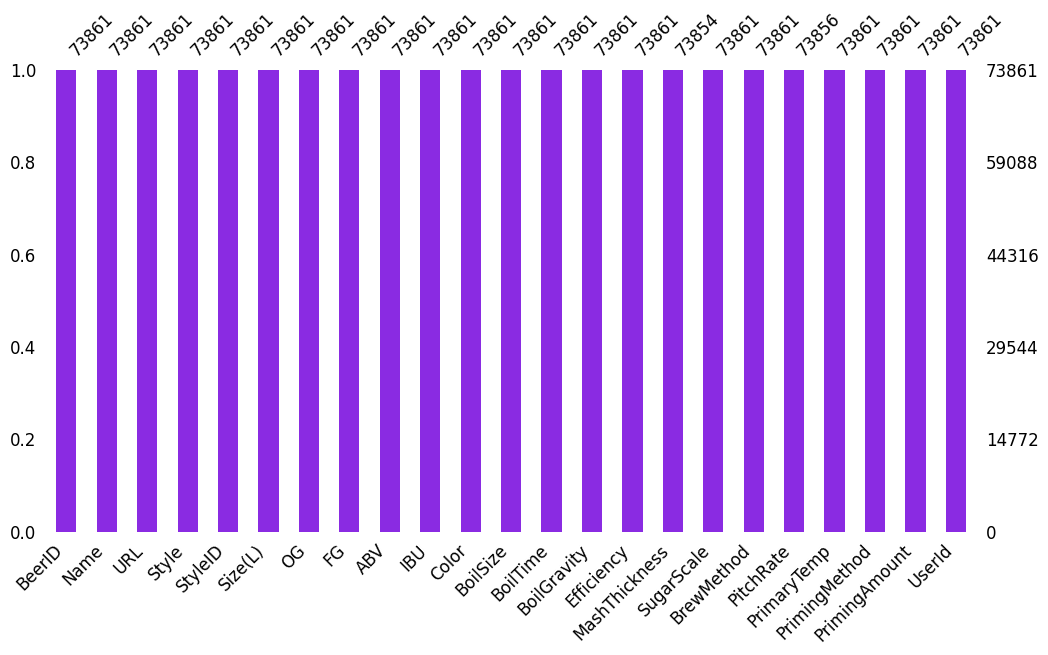

In [15]:
msno.bar(df_ffill, figsize=(12, 6), fontsize=12, color='blueviolet')

**Backwardfill**

In [16]:
# Aplicando o método Backward Fill (bfill) para preencher valores ausentes
df_bfill = df.copy()

# Preenchendo valores ausentes com o próximo valor observado não ausente (backward fill)
df_bfill.fillna(method='bfill', inplace=True)

# Exibindo as primeiras linhas do DataFrame após o preenchimento
print("DataFrame após aplicar Backward Fill (bfill):")
print(df_bfill.head())

DataFrame após aplicar Backward Fill (bfill):
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                       

/tmp/ipykernel_1820/1556358358.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill.fillna(method='bfill', inplace=True)


<Axes: >

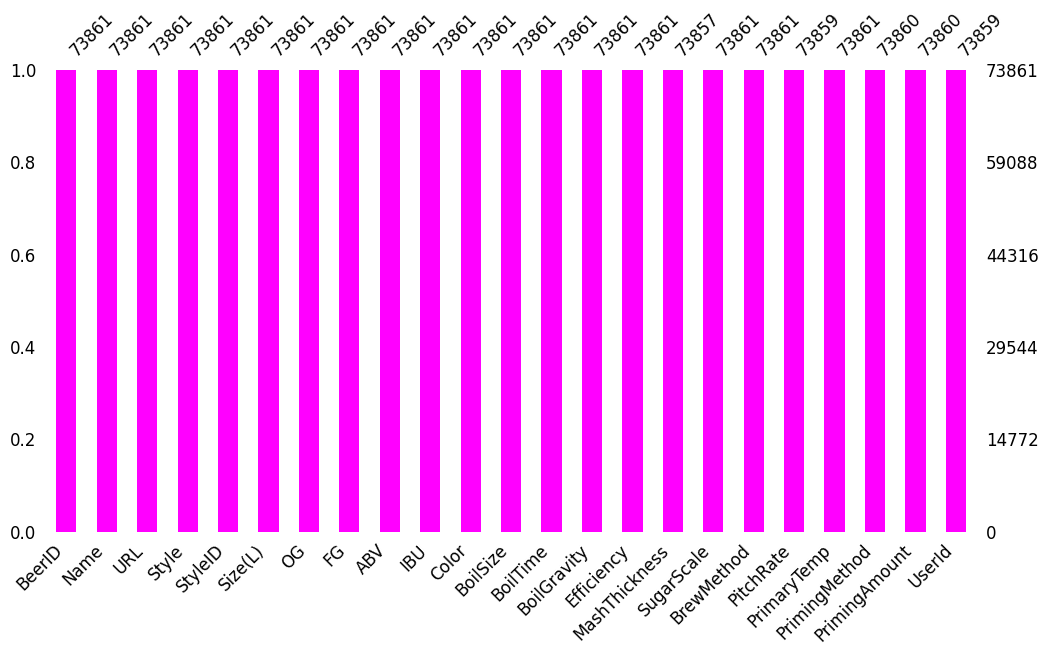

In [17]:
msno.bar(df_bfill, figsize=(12, 6), fontsize=12, color='fuchsia')

**Imputação de Dados Ausentes com Média Móvel**

In [18]:
# Copiar o DataFrame original para evitar modificar o original
df_moving_avg = df.copy()

# Definir o tamanho da janela para a média móvel
window_size = 3  # Ajuste conforme necessário

# Preencher valores ausentes com a média móvel
for column in df_moving_avg.columns:
    if df_moving_avg[column].dtype in ['float64', 'int64']:  # Verifica se a coluna é numérica
        df_moving_avg[column] = df_moving_avg[column].fillna(df_moving_avg[column].rolling(window=window_size, min_periods=1).mean())

# Exibir as primeiras linhas do DataFrame após a imputação
print("DataFrame após aplicar a imputação com média móvel:")
print(df_moving_avg.head())

DataFrame após aplicar a imputação com média móvel:
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                 

<Axes: >

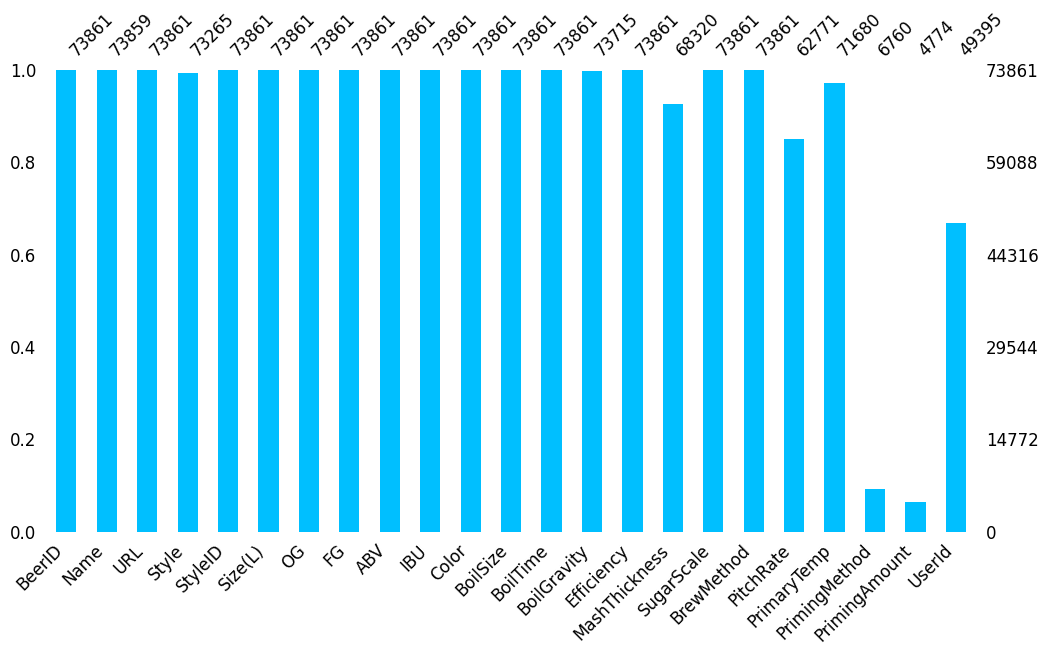

In [19]:
msno.bar(df_moving_avg, figsize=(12, 6), fontsize=12, color='deepskyblue')

**Interpolação por modelo linear, polinomial e spline**

In [20]:
# Copiar o DataFrame original para evitar modificar o original
df_interpolated = df.copy()

# Imputação usando interpolação linear
df_interpolated_linear = df_interpolated.interpolate(method='linear')

# Imputação usando interpolação polinomial (grau 2)
df_interpolated_polynomial = df_interpolated.interpolate(method='polynomial', order=2)

# Imputação usando interpolação por splines (grau 3)
df_interpolated_spline = df_interpolated.interpolate(method='spline', order=3)

# Exibir as primeiras linhas dos DataFrames após a imputação
print("DataFrame após aplicar a interpolação linear:")
print(df_interpolated_linear.head())

print("\nDataFrame após aplicar a interpolação polinomial (grau 2):")
print(df_interpolated_polynomial.head())

print("\nDataFrame após aplicar a interpolação por splines (grau 3):")
print(df_interpolated_spline.head())

/tmp/ipykernel_1820/3982392107.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated_linear = df_interpolated.interpolate(method='linear')
/tmp/ipykernel_1820/3982392107.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated_polynomial = df_interpolated.interpolate(method='polynomial', order=2)
/tmp/ipykernel_1820/3982392107.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated_spline = df_interpolated.interpolate(method='spline', order=3)


DataFrame após aplicar a interpolação linear:
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   
3                       

Modelo linear

<Axes: >

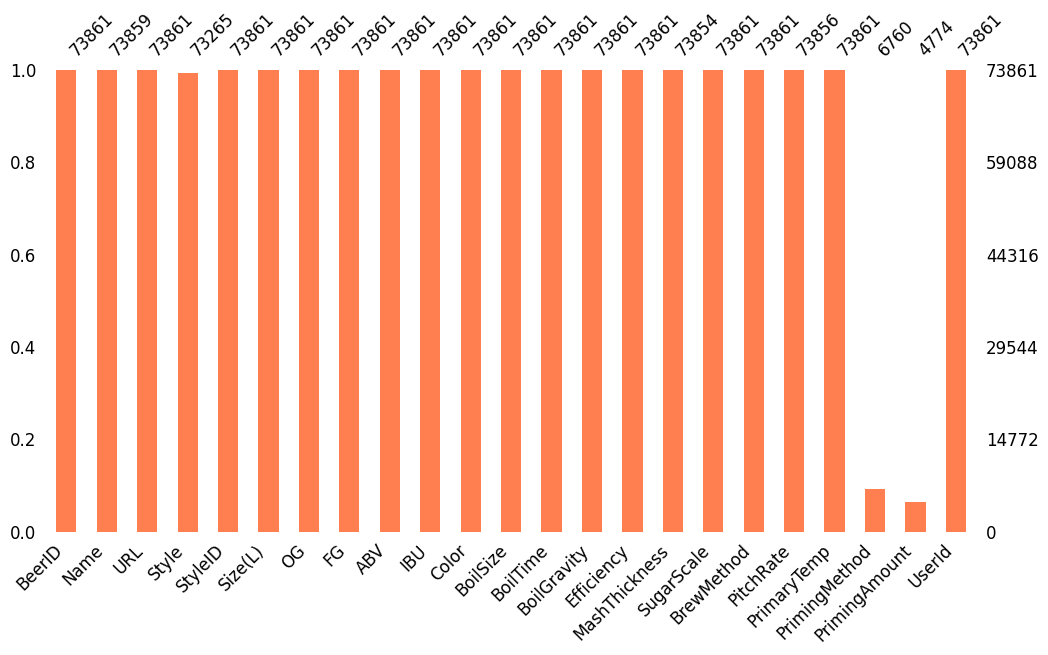

In [21]:
msno.bar(df_interpolated_linear, figsize=(12, 6), fontsize=12, color='coral')

**Imputação por distribuição de probabilidade**

In [22]:
# Copiar o DataFrame original para evitar modificar o original
df_prob = df.copy()

# Coluna a ser imputada (exemplo: 'Value')
column_to_impute = 'MashThickness'

# Estimativa dos parâmetros da distribuição normal
mean = df_prob[column_to_impute].mean()
std_dev = df_prob[column_to_impute].std()

# Identificar os valores ausentes
missing_mask = df_prob[column_to_impute].isnull()

# Gerar valores simulados para preencher os dados ausentes
simulated_values = np.random.normal(loc=mean, scale=std_dev, size=missing_mask.sum())

# Preencher os valores ausentes com os valores simulados
df_prob.loc[missing_mask, column_to_impute] = simulated_values

# Exibir as primeiras linhas do DataFrame após a imputação
print("DataFrame após a imputação por distribuição de probabilidade (normal):")
print(df_prob.head())

DataFrame após a imputação por distribuição de probabilidade (normal):
   BeerID                             Name  \
0       1                Vanilla Cream Ale   
1       2      Southern Tier Pumking clone   
2       3      Zombie Dust Clone - EXTRACT   
3       4    Zombie Dust Clone - ALL GRAIN   
4       5  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale       45    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021  8.16   
2                        American IPA        7    18.93  1.063  1.018  5.91   

<Axes: >

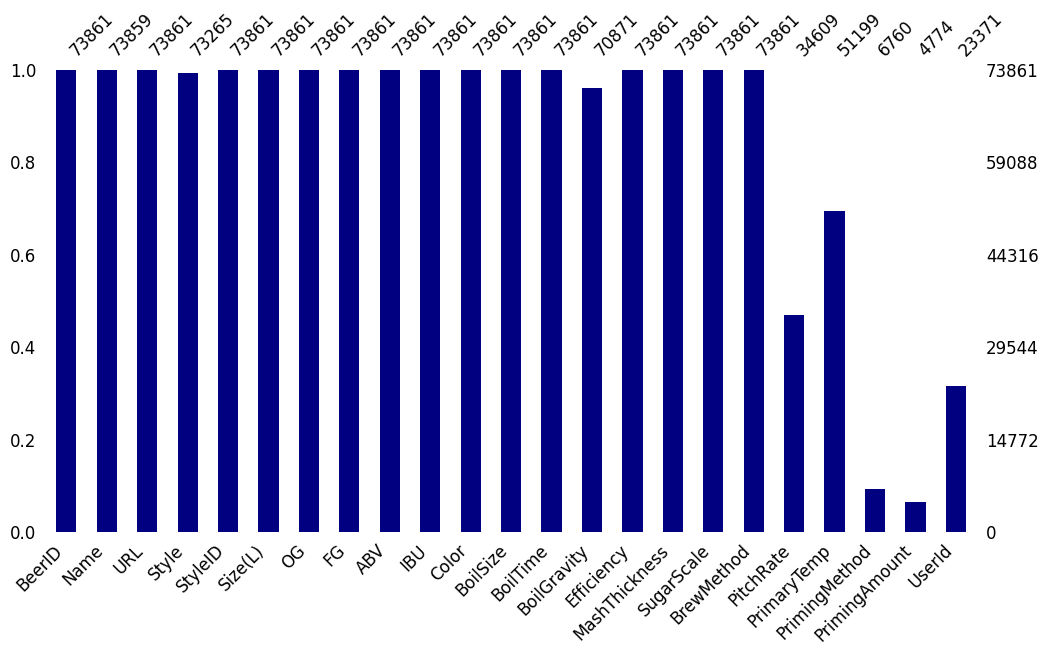

In [23]:
msno.bar(df_prob, figsize=(12, 6), fontsize=12, color='navy')

**Imputação multipla**

In [24]:
# Separar variáveis categóricas e numéricas
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Codificação das variáveis categóricas
label_encoders = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Configuração do Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Aplicação do Imputer
df_imputed_encoded = imputer.fit_transform(df_encoded)
df_imputed = pd.DataFrame(df_imputed_encoded, columns=df_encoded.columns, index=df.index)

# Decodificação das variáveis categóricas
for col in categorical_cols:
    df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].astype(int))

# Exibição do Resultado
print(df_imputed.head())

   BeerID                             Name  \
0     1.0                Vanilla Cream Ale   
1     2.0      Southern Tier Pumking clone   
2     3.0      Zombie Dust Clone - EXTRACT   
3     4.0    Zombie Dust Clone - ALL GRAIN   
4     5.0  Bakke Brygg Belgisk Blonde 50 l   

                                                 URL  \
0       /homebrew/recipe/view/1633/vanilla-cream-ale   
1  /homebrew/recipe/view/16367/southern-tier-pumk...   
2  /homebrew/recipe/view/5920/zombie-dust-clone-e...   
3  /homebrew/recipe/view/5916/zombie-dust-clone-a...   
4  /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                Style  StyleID  Size(L)     OG     FG   ABV  \
0                           Cream Ale     45.0    21.77  1.055  1.013  5.48   
1  Holiday/Winter Special Spiced Beer     85.0    20.82  1.083  1.021  8.16   
2                        American IPA      7.0    18.93  1.063  1.018  5.91   
3                        American IPA      7.0    22.71  1.061  1.017 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

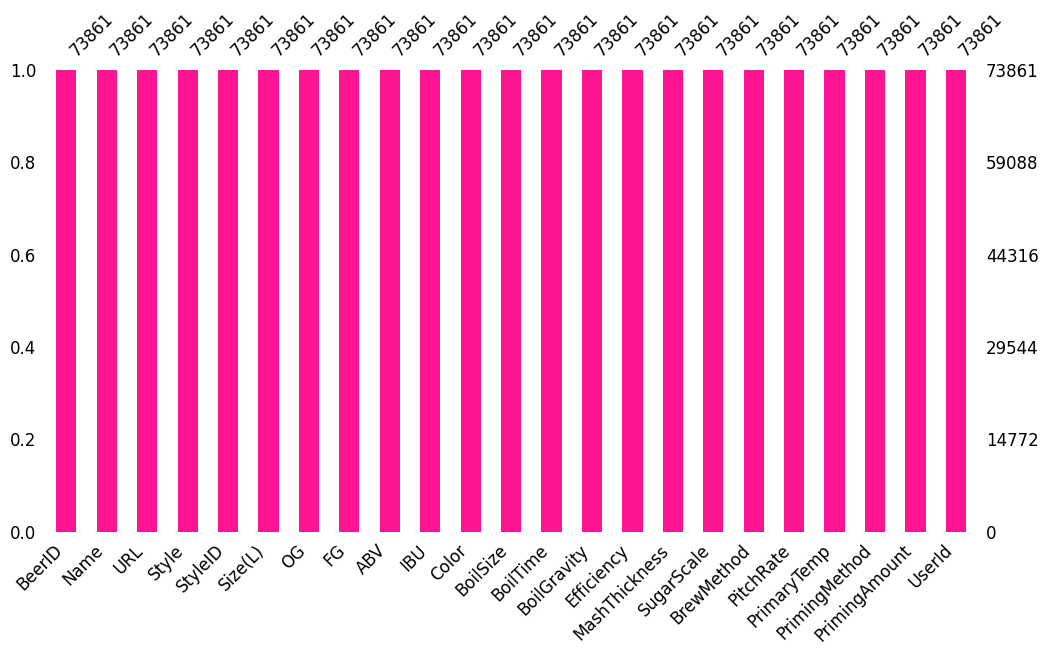

In [25]:
msno.bar(df_imputed, figsize=(12, 6), fontsize=12, color='deeppink')

**Imputação de Valores Ausentes com K-Nearest Neighbors (KNNImputer)**

In [26]:
from sklearn.impute import KNNImputer

# Selecionar apenas as colunas numéricas para imputação
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Instanciar o KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Aplicar o KNNImputer para preencher os valores ausentes
df_numeric_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

# Se você também quiser imputar as colunas categóricas, você pode adicionar esse passo
# Exemplo: Imputar colunas categóricas com moda (frequência máxima)
df_categorical = df.select_dtypes(include=['object'])
df_categorical_imputed = df_categorical.fillna(df_categorical.mode().iloc[0])

# Juntar os DataFrames imputados
df_KNN = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)

# Exibir as primeiras linhas do DataFrame imputado para verificar o resultado
print(df_KNN.head())

   BeerID  StyleID  Size(L)     OG     FG   ABV    IBU  Color  BoilSize  \
0     1.0     45.0    21.77  1.055  1.013  5.48  17.65   4.83     28.39   
1     2.0     85.0    20.82  1.083  1.021  8.16  60.65  15.64     24.61   
2     3.0      7.0    18.93  1.063  1.018  5.91  59.25   8.98     22.71   
3     4.0      7.0    22.71  1.061  1.017  5.80  54.48   8.50     26.50   
4     5.0     20.0    50.00  1.060  1.010  6.48  17.84   4.57     60.00   

   BoilTime  ...  PitchRate  PrimaryTemp   UserId  \
0      75.0  ...       0.57       17.780    116.0   
1      60.0  ...       0.65       19.446    955.0   
2      60.0  ...       0.75       19.444  20637.8   
3      60.0  ...       0.75       19.444  20637.8   
4      90.0  ...       0.80       19.000  18325.0   

                              Name  \
0                Vanilla Cream Ale   
1      Southern Tier Pumking clone   
2      Zombie Dust Clone - EXTRACT   
3    Zombie Dust Clone - ALL GRAIN   
4  Bakke Brygg Belgisk Blonde 50 l   

 

<Axes: >

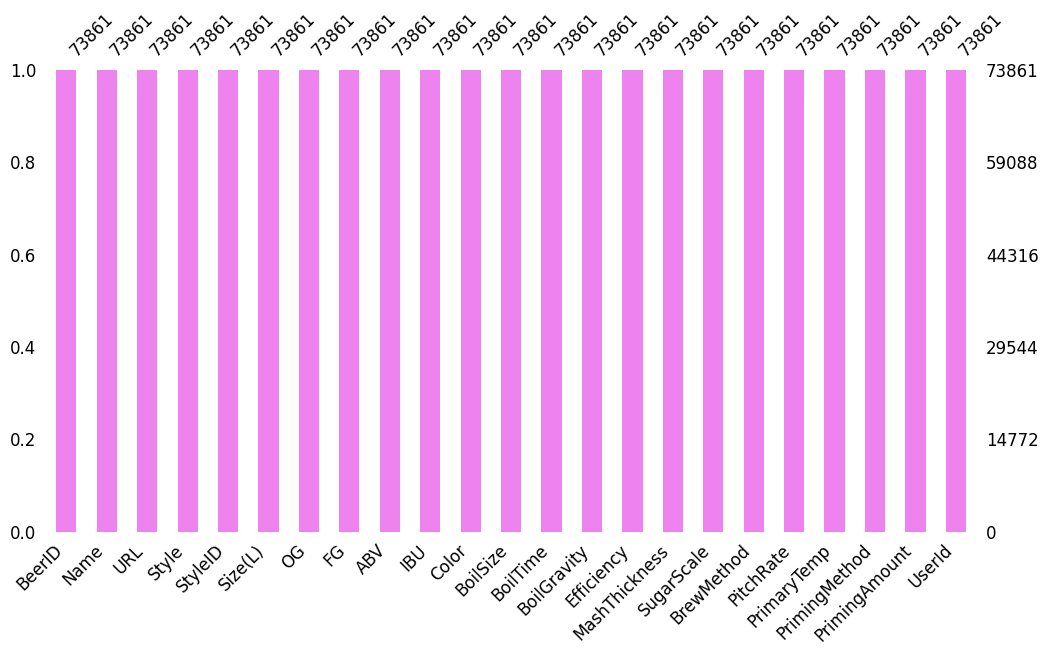

In [27]:
msno.bar(df_imputed, figsize=(12, 6), fontsize=12, color='violet')

**Verificando valores substituídos**

In [28]:
# Consultando o DataFrame atualizado para os índices que tinham valores nulos
df_substituido = df_imputed.loc[indices_nulos]

# Exibindo o que aconteceu com esses registros após a substituição dos valores nulos
df_substituido

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
38,39.0,Rochefort 8 Clone,/homebrew/recipe/view/188995/rochefort-8-clone,nan,111.0,18.93,1.079,1.019,7.90,0.00,...,1.187782,65.0,1.624302,Specific Gravity,All Grain,0.862603,18.245550,nan,nan,20570.251589
87,88.0,Zatarain's Root Beer - Non-Alcoholic keg in...,/homebrew/recipe/view/21783/zatarain-s-root-be...,nan,111.0,18.93,1.046,1.013,4.27,0.00,...,1.077000,100.0,-1.089487,Specific Gravity,BIAB,0.821478,18.266852,nan,nan,993.000000
192,193.0,Hop Cliff,/homebrew/recipe/view/188896/hop-cliff,nan,111.0,18.93,1.093,1.023,9.12,0.00,...,1.231265,75.0,2.173588,Specific Gravity,Partial Mash,0.903328,18.056326,nan,nan,23496.223141
347,348.0,Mosaic IPL,/homebrew/recipe/view/56751/mosaic-ipl,nan,111.0,20.82,1.063,1.016,6.16,68.35,...,1.133542,78.0,7.330198,Specific Gravity,All Grain,2.000000,10.000000,nan,nan,15452.000000
577,578.0,Nanny state,/homebrew/recipe/view/329814/nanny-state,nan,111.0,20.00,1.008,1.006,0.30,55.43,...,1.006000,70.0,3.000000,Specific Gravity,All Grain,0.932882,17.003892,nan,nan,3053.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73413,73414.0,Summer saison,/homebrew/recipe/view/617449/summer-saison,nan,111.0,18.93,1.064,1.019,5.84,31.69,...,1.106000,35.0,12.374309,Specific Gravity,extract,0.148873,20.000000,nan,nan,130414.000000
73600,73601.0,Cara Red,/homebrew/recipe/view/614632/cara-red,nan,111.0,22.71,1.046,1.010,4.61,68.81,...,1.037000,70.0,1.500000,Specific Gravity,All Grain,0.967099,17.691508,nan,nan,53199.000000
73634,73635.0,Wit Easter Beer,/homebrew/recipe/view/611645/wit-easter-beer,nan,111.0,21.00,1.025,1.006,2.52,7.43,...,1.018000,35.0,2.945622,Specific Gravity,BIAB,0.566001,20.000000,nan,nan,73726.610321
73700,73701.0,Chinook the Crook,/homebrew/recipe/view/615888/chinook-the-crook,nan,111.0,20.82,1.055,1.010,5.90,68.19,...,1.043000,75.0,1.500000,Specific Gravity,All Grain,0.500000,22.220000,nan,nan,75668.107962


In [29]:
# Verificando dados
print ("Tabela 1 - Verificação de dados")
print(df_imputed.info())
print("\n") #paragráfo entre os resultados

# Verificando se há algum valor vazio
print ("Tabela 2 - Verificação de dados vazios")
print(df_imputed.isna().any())
print("\n")

# Verificando quantidade de dados vazios
print ("Tabela 3 - Verificação de quantidade de dados vazios")
print(df_imputed.isna().sum())
print("\n")

Tabela 1 - Verificação de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  float64
 1   Name           73861 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73861 non-null  object 
 4   StyleID        73861 non-null  float64
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  float64
 13  BoilGravity    73861 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  73861 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     738